In [4]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [6]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-11,24.247334,23.333332,23.423332,24.246000,115006500.0,24.246000
2017-09-12,24.584000,24.026667,24.299334,24.183332,89593500.0,24.183332
2017-09-13,24.538000,23.972668,24.254667,24.415333,62778000.0,24.415333
2017-09-14,25.197332,24.175333,24.288668,25.176001,108037500.0,25.176001
2017-09-15,25.333332,24.846666,24.967333,25.320667,81307500.0,25.320667


## Simple Moving Average (SMA)

In [9]:
# Simple Moving Average --> Smoothening of Graph
df_tesla['Open'].rolling(3).mean()

Date
2017-09-11           NaN
2017-09-12           NaN
2017-09-13     23.992444
2017-09-14     24.280890
2017-09-15     24.503556
                 ...    
2022-09-01    280.356659
2022-09-02    278.089996
2022-09-06    275.443329
2022-09-07    275.616669
2022-09-08    275.693329
Name: Open, Length: 1258, dtype: float64

<AxesSubplot:xlabel='Date'>

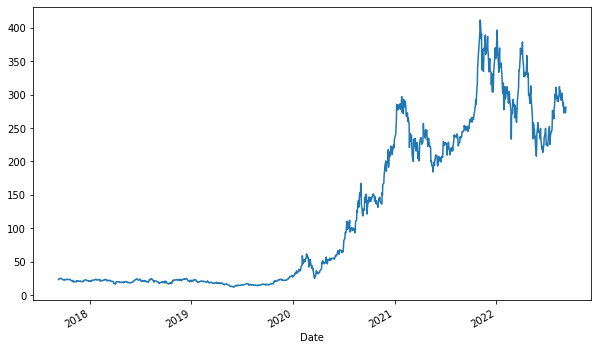

In [11]:
df_tesla['Open'].plot(figsize=(10,6))

In [18]:
df_tesla['Open_10_days_rolling'] = df_tesla['Open'].\
rolling(window=10, min_periods=10).mean()
df_tesla['Open_20_days_rolling'] = df_tesla['Open'].\
rolling(window=20, min_periods=20).mean()
df_tesla['Open_30_days_rolling'] = df_tesla['Open'].\
rolling(window=30, min_periods=30).mean()

<AxesSubplot:xlabel='Date'>

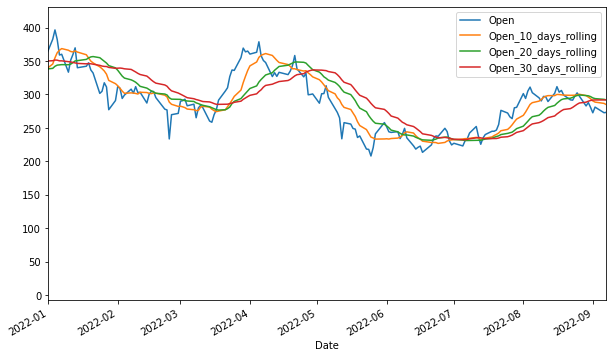

In [21]:
df_tesla[['Open', 'Open_10_days_rolling', 'Open_20_days_rolling', 'Open_30_days_rolling']].plot(xlim=['2022-01-01', '2022-09-07'], figsize=(10,6))

### Disadvantages to SImpleMovingAverage
1. Giving similar importance to all the data in rolling window, where as in time series analysis we should give more importance/weight to recent data.

## Cumulative Moving Average (CMA)

<AxesSubplot:xlabel='Date'>

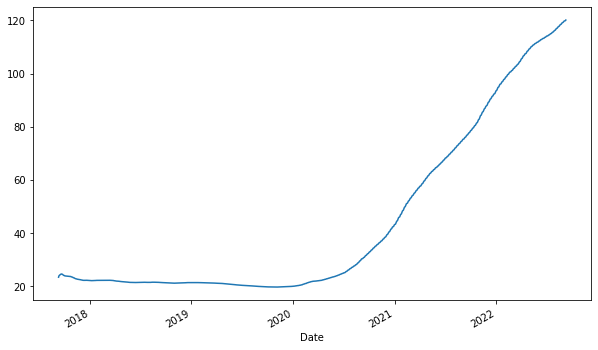

In [23]:
# Expanding
# CMA
df_tesla['Open'].expanding().mean().plot(figsize=(10,6))

## Exponential Weighted Moving Average (EWMA)

Our focus should be on the recent data.

In [28]:
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

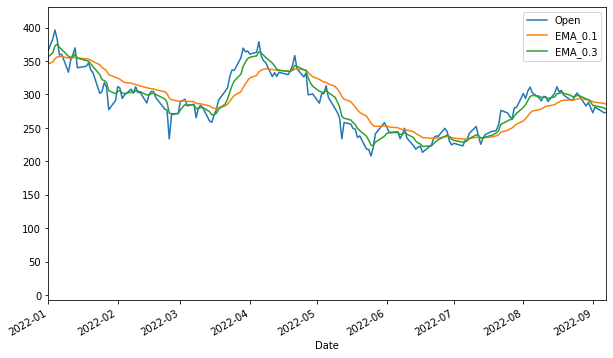

In [29]:
df_tesla[['Open', 'EMA_0.1', 'EMA_0.3']].plot(xlim=['2022-01-01', '2022-09-07'], figsize=(10,6))